<a href="https://colab.research.google.com/github/TADebastiani/Trabalho-Optativa-X/blob/codelabs/Trabalho_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FEATURE SELECTION

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets as ds
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectPercentile, chi2

data = ds.load_wine()

##LOW VARIANCE

In [0]:
sel = VarianceThreshold(threshold=.2)
new_x = sel.fit_transform(data.data)
print(data.data.shape)
print(sel.variances_)
print(new_x.shape)

(178, 13)
[6.55359730e-01 1.24100408e+00 7.48418003e-02 1.10900306e+01
 2.02843328e+02 3.89489032e-01 9.92113512e-01 1.54016191e-02
 3.25754248e-01 5.34425585e+00 5.19514497e-02 5.01254463e-01
 9.86096010e+04]
(178, 10)


## UNIVARIATE SELECTION

In [0]:
k_factor = data.data.shape[1] / 2

# Select the best features
skb = SelectKBest(score_func=chi2, k=k_factor)
skb.fit(data.data, data.target)

# Concat data frames to print
df_scores = pd.DataFrame(skb.scores_)
df_columns = pd.DataFrame(data.feature_names)
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Specs', 'Score']
print("SelectKBest")
print("Best Features:")
print(feature_scores.nlargest(int(k_factor), 'Score'))
print()
print("Score:")
print(feature_scores.sort_values('Score', ascending=False))

# Percentile Selection
percentile = 20
bests = SelectPercentile(score_func=chi2, percentile=20).fit_transform(data.data, data.target)

print()
print("SelectPercentile (" + str(percentile) + "%)")
print("Before:")
print(data.data.shape)
print()
print("After:")
print(bests.shape)

SelectKBest
Best Features:
                Specs         Score
12            proline  16540.067145
9     color_intensity    109.016647
6          flavanoids     63.334308
4           magnesium     45.026381
3   alcalinity_of_ash     29.383695
1          malic_acid     28.068605

Score:
                           Specs         Score
12                       proline  16540.067145
9                color_intensity    109.016647
6                     flavanoids     63.334308
4                      magnesium     45.026381
3              alcalinity_of_ash     29.383695
1                     malic_acid     28.068605
11  od280/od315_of_diluted_wines     23.389883
5                  total_phenols     15.623076
8                proanthocyanins      9.368283
0                        alcohol      5.445499
10                           hue      5.182540
7           nonflavanoid_phenols      1.815485
2                            ash      0.743381

SelectPercentile (20%)
Before:
(178, 13)

After:
(178,

##FEATURE IMPORTANCE

[0.1219165  0.06438749 0.01570622 0.02334329 0.04738289 0.06297945
 0.12240609 0.0262101  0.02948467 0.09075611 0.14162869 0.09334899
 0.16044951]


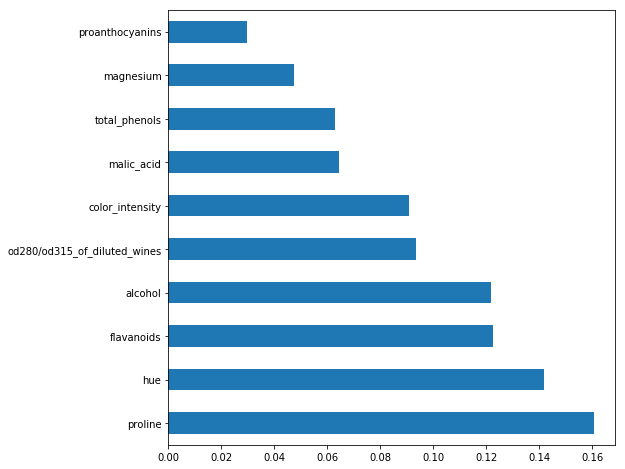

In [0]:
model = ExtraTreesClassifier(n_estimators=10)
model.fit(data.data, data.target)
print(model.feature_importances_)  # use inbuilt class feature_importances of tree based classifiers

# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=data.feature_names)
plt.figure(figsize=[8,8])
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

##CORRELATION SELECTION

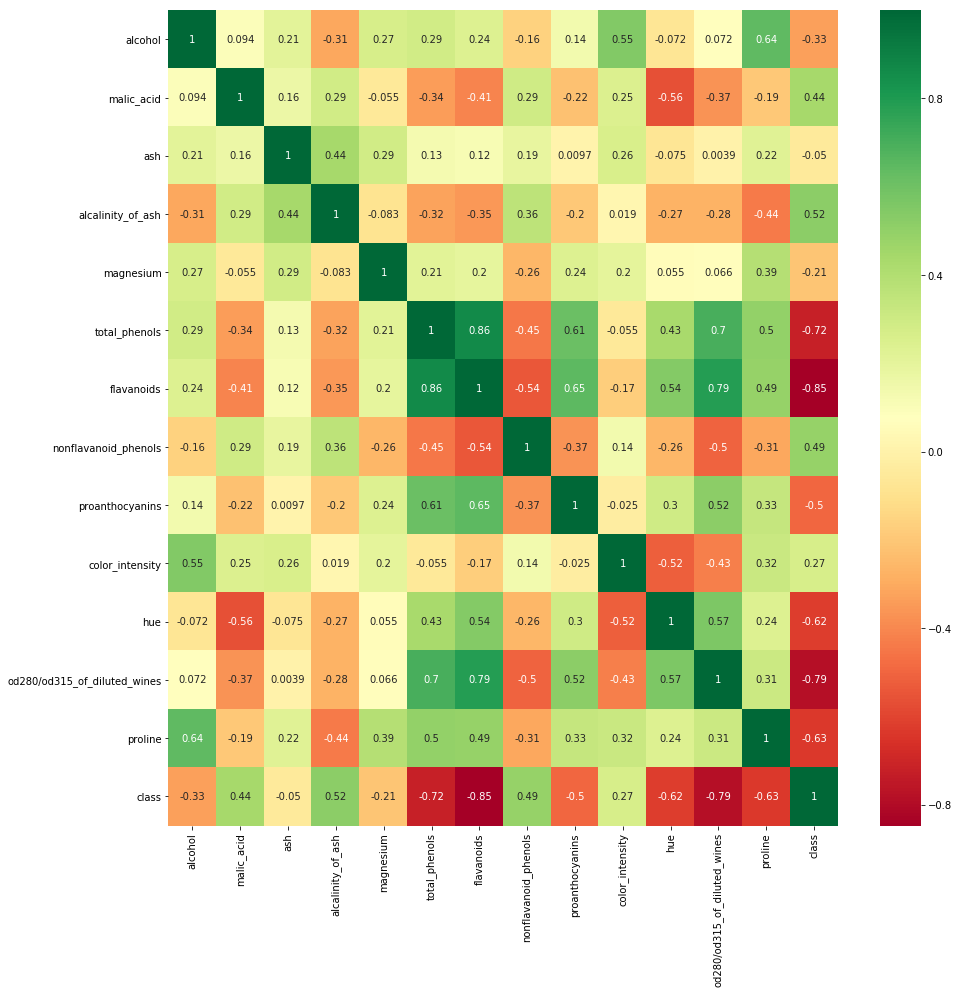

In [0]:
# Insere a classe como última coluna
new_data = np.append(data.data, data.target.reshape(data.target.shape[0], 1), axis=1)

# cria um DataFrame com os dados
data_frame = pd.DataFrame(new_data, columns=np.append(data.feature_names, ['class']))

correlation = data_frame.corr()
top_corr_features = correlation.index
plt.figure(figsize=[15,15])

sns.heatmap(data_frame[top_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.show()